In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from scipy.integrate import solve_ivp
import perlin

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()

In [125]:
# Constants
pi = np.pi
twopi = 2*np.pi
sqrt2 = np.sqrt(2)
sqrt3 = np.sqrt(3)
degree = pi/180

# Colors

winter = ['#0D1B2A','#1B263B','#415A77','#778DA9','#E0E1DD']
summer = ["#0081af","#00abe7","#56351E","#ead2ac","#eaba6b"]
autumn = ["#f0a202","#f18805","#d95d39","#202c59","#581f18"]
spring = ["#FAC8CD","#66a182","#233329","#FFB30F","#c0d461"]
pikachu = ["#000000","#eabb1f","#C04A35","#846339","#daaf44","#eabb1f","#846339","#daaf44"]
paradise_pink = ["#053225","#e34a6f","#f7b2bd","#b2a198","#60a561"]
pastel  = ["#d6f6dd","#dac4f7","#f4989c","#ebd2b4","#acecf7"]
pastel2 = ["#dd6e42","#4f6d7a","#b37ba4","#d99ac5","#acecf7"]
bright_winter = ["#2b4141","#0eb1d2","#34e4ea","#8ab9b5","#c8c2ae"]
flags = ["#d05353","#083d77","#ebebd3","#f4d35e","#0ead69"]
midnight_gradient = ["#432371","#502D72","#5D3772","#6A4173","#774B74","#845575","#915F75","#9F6976","#AC7277","#B97C77","#C68678","#D39079","#E09A7A","#EDA47A","#FAAE7B"]
midnight_blue = ["#251101","#470024","#5b1865","#2c5784","#5688c7"]


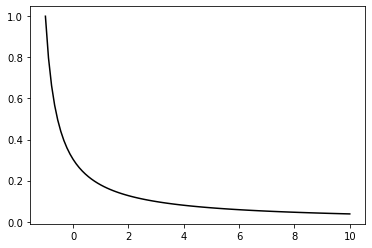

In [3]:
def perspective_scale(z,z_screen=-1,screen_size=sqrt2,fov=90):
    
    slope = np.tan(0.5*fov)
    focal_distance = 0.5*screen_size/slope
    scale = focal_distance/((z-z_screen)+focal_distance)
    return scale


Zs = np.linspace(-1,10,100)
plt.plot(Zs,perspective_scale(Zs),'k')
plt.show()

In [40]:
perlin_gen = perlin.PerlinNoiseFactory(dimension=3,octaves=1)

Zs: [ 5.          5.68888889  6.42222222  7.2         8.02222222  8.88888889
  9.8        10.75555556 11.75555556 12.8        13.88888889 15.02222222
 16.2        17.42222222 18.68888889] 

Scales: [0.08029845 0.07126779 0.06364791 0.0571654  0.05160872 0.04681243
 0.04264585 0.03900485 0.03580566 0.03298037 0.03047351 0.02823939
 0.0262402  0.02444436 0.02282543] 

Speeds: [3.51793846 3.12229821 2.7884649  2.50446138 2.26101887 2.0508893
 1.86834843 1.7088332  1.56867417 1.44489618 1.33506836 1.23719009
 1.1496037  1.07092688 1.        ] 

Radii: [27.99486477 24.84645966 22.18989863 19.9298704  17.99261649 16.32045849
 14.86784442 13.59846253 12.48311239 11.49811848 10.62413641  9.84524591
  9.14825558  8.5221653   7.95774715] 

Angles: [25.58316497 28.82492128 32.27582316 35.9358706  39.80506362 43.8834022
 48.17088635 52.66751606 57.37329135 62.2882122  67.41227863 72.74549062
 78.28784818 84.0393513  90.        ] 

Arcs: [12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 

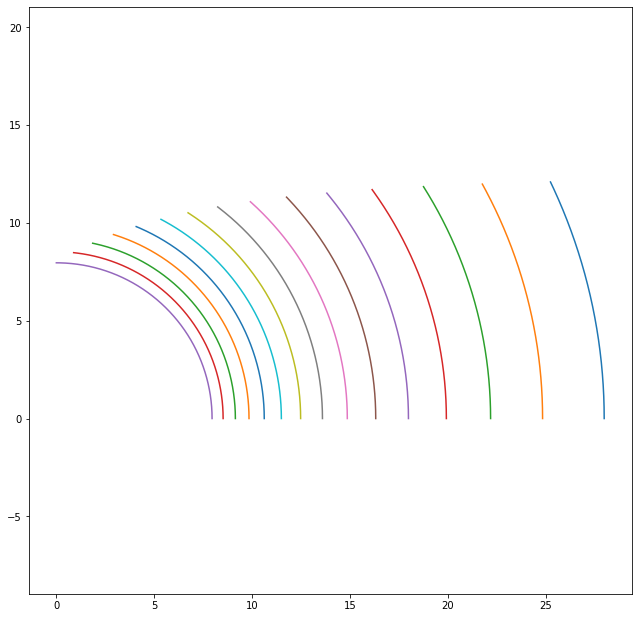

In [101]:
n_lines = 15
#t_end = 1
v_final = 1
d_final = 50 # v_final*t_end

t_end = d_final/v_final
Xs = np.linspace(0,1,500)

Zs = np.linspace(np.sqrt(5),np.sqrt(n_lines+5),n_lines,endpoint=False)**2

print('Zs:',Zs,'\n')
Scales = perspective_scale(Zs,z_screen=0)
print('Scales:',Scales,'\n')
Speeds = v_final*Scales/Scales[-1]
print('Speeds:',Speeds,'\n')
Radii = t_end*Speeds/twopi
print('Radii:',Radii,'\n')

arc = d_final/4

Angles = (arc/Radii)
Angles_deg = Angles/degree
print('Angles:',Angles_deg,'\n')

print('Arcs:',Angles*Radii,'\n')
#Y1 = Radii*np.cos(Angles*Xs)
#Y2 = Radii*np.sin(Angles*Xs)
lines =  [np.array([perlin_gen(x,r*np.cos(theta*x),r*np.sin(theta*x)) for x in Xs])
          for (r,theta) in zip(Radii,Angles)]

fig, ax = plt.subplots(figsize=(10.8,10.8))
for r, theta in zip(Radii,Angles):
    ax.plot(r*np.cos(theta*Xs),r*np.sin(theta*Xs))
ax.axis('equal')
plt.show()

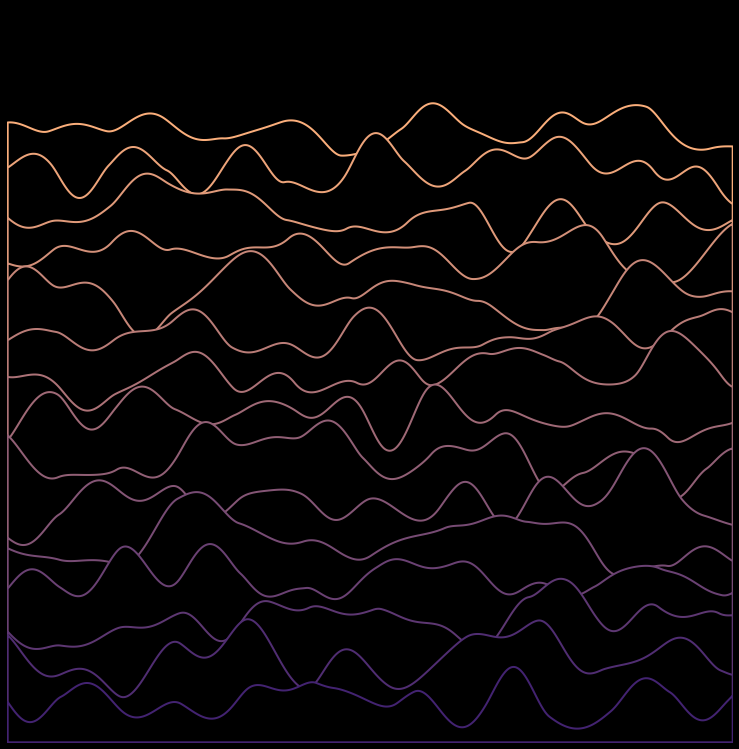

In [123]:
separation= 0.5

fig, ax = plt.subplots(figsize=(10.8,10.8))
fig.tight_layout()
fig.patch.set_alpha(1)
fig.set_facecolor('k')
for count, (line,color) in enumerate(zip(lines,midnight_gradient[::-1])):
    
    #ax.plot(Xs,line + separation*(n_lines-count),color=color,lw=2)
    ax.fill_between(Xs,0,line + separation*(n_lines-count),fc='k',ec=color,lw=2)
    
ax.set_xlim(0,1)
ax.set_ylim(0,9)
ax.axis('off')
ax.set_facecolor('k')
plt.show()

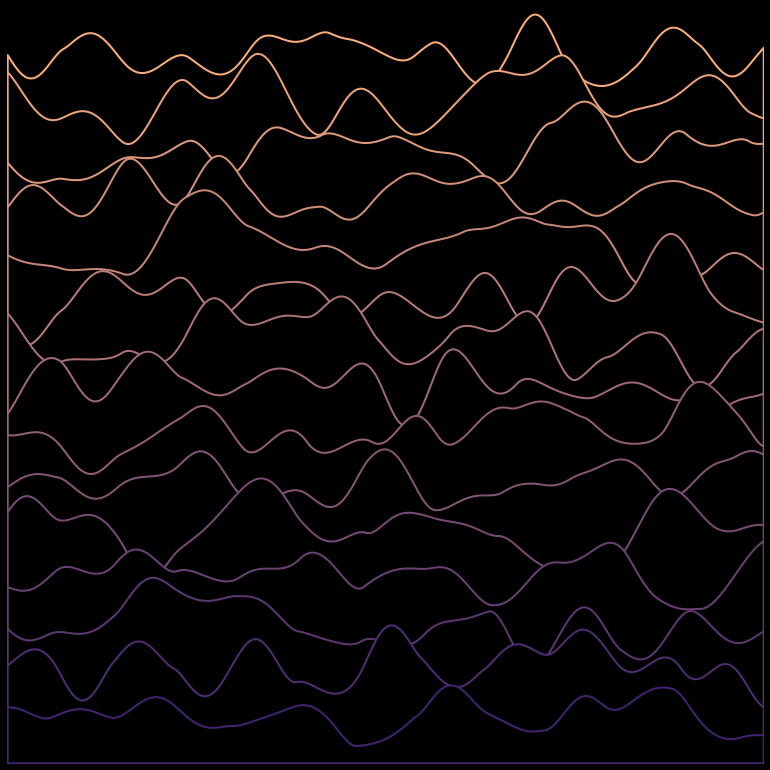

In [124]:
n_frames = 60*10

Ts = np.linspace(0,t_end,n_frames,endpoint=False)

fig, ax = plt.subplots(figsize=(10.8,10.8))
fig.patch.set_alpha(1)
fig.set_facecolor('k')


for frame, t in enumerate(Ts):

    ax.cla()
    
    phase = twopi*t/t_end

    
    lines =  [np.array([perlin_gen(np.cos(twopi*k/n_lines + phase),r*np.cos(theta*x-phase),r*np.sin(theta*x-phase)) for x in Xs])
          for k, (r,theta) in enumerate(zip(Radii,Angles))]
    
    
    for count, (line,color) in enumerate(zip(lines[::-1],midnight_gradient[::-1])):
    
        ax.fill_between(Xs,0,line + separation*(n_lines-count),ec=color,lw=2,fc='k')
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,8)
    ax.axis('off')
    ax.set_facecolor('k')
    fig.tight_layout()
                                         
    fig.savefig("animation/parallax-%04d.png"%frame, dpi = 100,bbox_inches='tight',pad_inches=0)
    print('Frame',frame+1,'of',n_frames,end='\r')
